In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
%matplotlib inline

In [2]:
t = np.linspace(0.0,1.0,11)
x = np.sin(2*np.pi*t)
y = np.cos(2*np.pi*t)
tck, u = interpolate.splprep([x, y], s=0)
t,c,k = tck # t = knots, c = coefficients, k = degree of spline

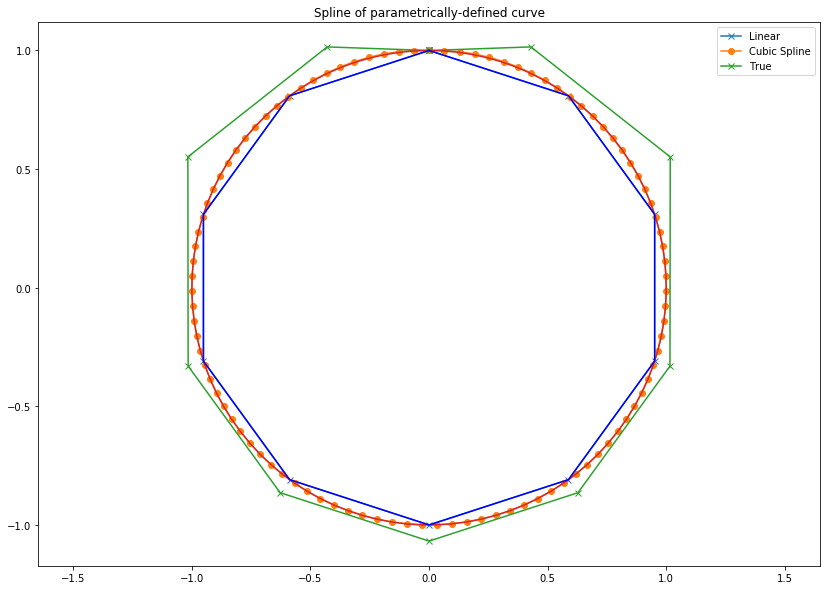

In [3]:
unew = np.linspace(0, 1.0, 100)
out = interpolate.splev(unew, tck)
plt.figure(figsize=[14,10])
plt.plot(x, y, marker='x')
plt.plot(out[0], out[1], marker='o')
plt.plot(c[0],c[1],marker='x')
plt.plot(np.sin(2*np.pi*unew), np.cos(2*np.pi*unew), x, y, 'b')
plt.legend(['Linear', 'Cubic Spline', 'True'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.axis("equal")
plt.title('Spline of parametrically-defined curve')
plt.show()

In [4]:
t,c,k = tck

In [5]:
c

[array([-1.03279664e-17,  4.29462711e-01,  1.01668733e+00,  1.01553643e+00,
         6.27793771e-01,  3.45794451e-16, -6.27793771e-01, -1.01553643e+00,
        -1.01668733e+00, -4.29462711e-01, -2.44929360e-16]),
 array([ 1.        ,  1.01508954,  0.5513804 , -0.33027953, -0.86394927,
        -1.06802537, -0.86394927, -0.33027953,  0.5513804 ,  1.01508954,
         1.        ])]

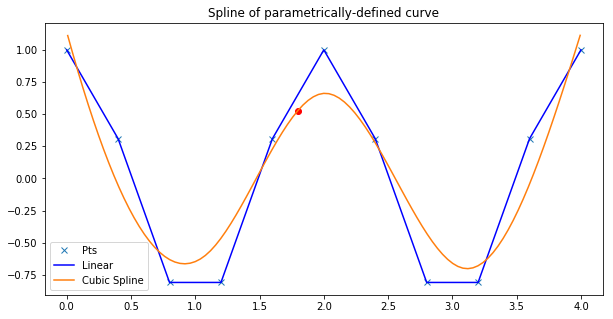

In [6]:
T = np.arange(0, 1.1, .1)
x = T * 4
y = np.cos(4*np.pi*T)
tck, u = interpolate.splprep([x, y], s=.5)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
t = 0.45
xt,yt = interpolate.splev(t, tck)
plt.figure(figsize=[10,5])
plt.plot(x, y, 'x', x, y, 'b')
plt.plot(out[0], out[1])
plt.scatter(xt,yt,c="red")
plt.legend(['Pts','Linear', 'Cubic Spline'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.axis("equal")
plt.title('Spline of parametrically-defined curve')
plt.show()

In [7]:
knots, coeffs, degree = tck
# N = np.zeros([len(knots),degree+1])
# for i in range(degree):
#     for k in range(len(knots)-1):
#         k1 = knots[k]
#         k2 = knots[k+1]
        

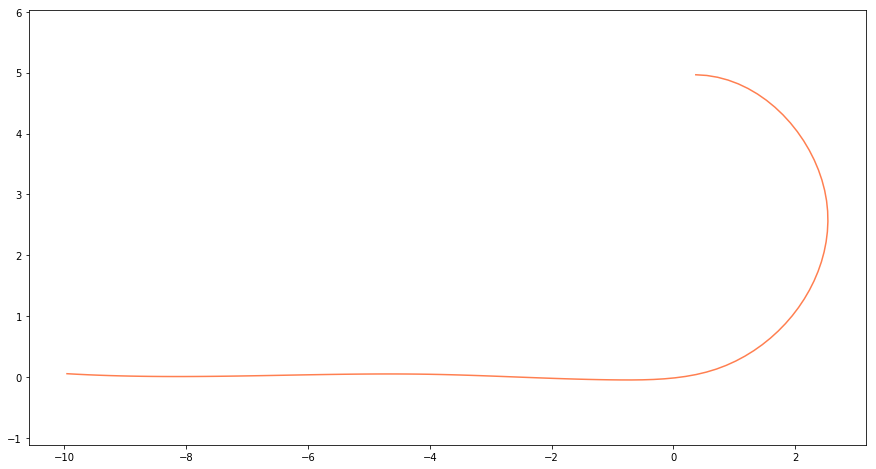

In [8]:
x1 = np.arange(-10.0,0.0,1.0)
x2 = 2.5*np.cos(np.arange(-np.pi/2.0,np.pi/2.0,.25))
y1 = np.zeros(x1.shape)
y2 = 2.5+2.5*np.sin(np.arange(-np.pi/2.0,np.pi/2.0,.25))
x = np.concatenate((x1,x2))
y = np.concatenate((y1,y2))
x = x + .05*np.random.rand(len(x))
y = y + .05*np.random.rand(len(y))

plt.figure(figsize=[15,8])
# plt.plot(x,y,'b',x,y,'bx')
# for s in [0.1, 0.25, 0.5, 1.0]:
#     tck, u = interpolate.splprep([x, y], s=s)
#     unew = np.arange(0, 1.01, 0.01)
#     out = interpolate.splev(unew, tck)
#     plt.plot(out[0],out[1])
tck, u = interpolate.splprep([x, y], s=0.025)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
plt.plot(out[0],out[1],c="coral")
plt.axis("equal")
plt.show()

# Recompute spline points manually

In [9]:
# P(t) = [t^3 t^2 t 1] * M * [c1 c2 c3 c4]^T
M_Basis_4 = (1.0/6) * np.array([
    [-1., 3., -3., 1.],
    [3., -6., 3., 0.],
    [-3., 0., 3., 0.],
    [1., 4., 1., 0.]
    ])

In [10]:
def P(t):
    return np.array([t**3, t**2, t**1, t**0])

In [11]:
idx = np.sum(t >= knots)
if knots[idx+1] - knots[idx] == 0.0:
    ts = 0.0
else:
    ts = (t - knots[idx]) / (knots[idx+1] - knots[idx])
C = np.stack(coeffs)
np.dot(P(ts),M_Basis_4).dot(C[:,idx-2:idx+2].T)

array([ 2.83036044, -0.60169033])

In [12]:
xt,yt

(array(1.79776139), array(0.52712767))

scipy values:        x=1.79776138617, y=0.527127667227
Cox de Boor values:  x=1.79776138617, y=0.527127667227


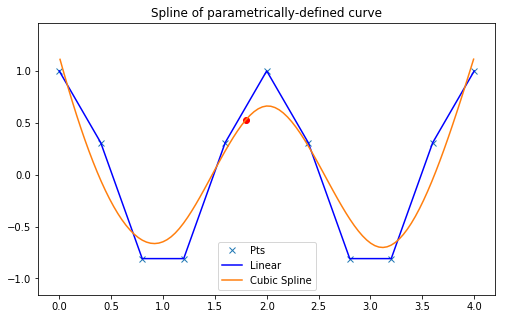

In [13]:
T = np.linspace(0, 1, 11)
x = T * 4
y = np.cos(4*np.pi*T)
tck, u = interpolate.splprep([x, y], s=.5)
unew = np.arange(0, 1.01, 0.01)
out = interpolate.splev(unew, tck)
t = 0.45
xt,yt = interpolate.splev(t, tck)
print('{:20} x={}, y={}'.format('scipy values:',xt,yt))

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.plot(x, y, 'x', x, y, 'b')
plt.plot(out[0], out[1])
plt.scatter(xt,yt,c="red")
plt.legend(['Pts','Linear', 'Cubic Spline'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.axis("equal")
plt.title('Spline of parametrically-defined curve')

knots, coeffs, degree = tck
N = np.zeros([len(knots),degree+1])

for k in range(degree+1):
    for i in range(len(coeffs[0])-1):
        t1 = knots[i]
        t2 = knots[i+k+1]
        if t1 <= t < t2:
            if k == 0:
                N[i,k] = 1.0
            else:
                t2 = knots[i+k]
                t3 = knots[i+k+1]
                N[i,k] = N[i,k-1]*(t-t1)/(t2-t1) + N[i+1,k-1]*(t3-t)/(t3 - knots[i+1])

xp,yp = C.dot(N[:,-1][:len(coeffs[0])])
print('{:20} x={}, y={}'.format('Cox de Boor values:',xp,yp))

# The B-Spline representation can only be converted to a cubic spline representation if the knots are evenly spaced (which they are not). 
## Unfortunately scipy.interpolate.splprep causes a segfault if I pass in an array of knot values

In [ ]:
T = np.linspace(0, 1, 11)
x = T * 4
y = np.cos(4*np.pi*T)

In [ ]:

interpolate.splprep([x, y], task=-1, t=[0,0,0,.25,.5,.75,1,1,1])

In [ ]:
tck, u = interpolate.splprep([x, y], s=.5, u=np.linspace(0,1,len(x)), task=-1, t=np.linspace(0,1,12))

In [ ]:
unew = np.linspace(0, 1)
out = interpolate.splev(unew, tck)
t = 0.45
xt,yt = interpolate.splev(t, tck)
# print('{:20} x={}, y={}'.format('scipy values:',xp,yp))

plt.figure(figsize=[18,5])
plt.subplot(1,2,1)
plt.plot(x, y, 'x', x, y, 'b')
plt.plot(out[0], out[1])
plt.scatter(xt,yt,c="red")
plt.legend(['Pts','Linear', 'Cubic Spline'])
plt.axis([-1.05, 1.05, -1.05, 1.05])
plt.axis("equal")
plt.title('Spline of parametrically-defined curve')

In [ ]:
knots, coeffs, degree = tck
plt.plot(knots)

In [ ]:
from scipy import interpolate
import numpy as np
T = np.linspace(0, 1, 11)
x = T * 4
y = np.cos(4*np.pi*T)

interpolate.splprep([x, y], task=-1, t=[0,0,0,.25,.5,.75,1,1,1])

interpolate.splprep([x, y], u=np.linspace(0,1,len(x)), task=-1, t=[0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1.0])

interpolate.splprep([x, y], task=-1, t=[0,.05,.1,.15,.2,.25,.3,.35,.4,.45,.5,.55,.6,.65,.7,.75,.8,.85,.9,.95,1.0])

interpolate.splprep([x, y], task=-1, t=np.linspace(0,1,20))